In [1]:
import sys
sys.path.insert(0, '..')

from multipliers import RSRBinaryMultiplier, RSRTernaryMultiplier, NaiveMultiplier

import math
import numpy as np
import tracemalloc

In [2]:
def measure_memory_usage(cls, *args, **kwargs):
    tracemalloc.start()  # Start tracking memory allocations

    # Instantiate the class
    instance = cls(*args, **kwargs)

    # Get current, peak memory usage (in bytes)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()  # Stop tracking

    print(f"Memory usage for {cls.__name__}: Current = {current / 1024:.2f} KB; Peak = {peak / 1024:.2f} KB")
    return instance

In [3]:
def generate_random_binary_matrix(n):
    # Generate a random binary matrix of size n x n
    binary_matrix = np.random.randint(2, size=(n, n))
    return binary_matrix

def generate_random_ternary_matrix(n):
    ternary_matrix = np.random.randint(low=-1, high=2, size=(n, n))
    return ternary_matrix

def generate_random_int_vector(size, low=0, high=100):
    random_vector = np.random.randint(low, high, size)
    return random_vector

In [4]:
n_s = [2**i for i in range(11, 16)]

In [5]:
binary_matrices = [generate_random_binary_matrix(n) for n in n_s]
ternary_matrices = [generate_random_ternary_matrix(n) for n in n_s]

In [6]:
naive_usage = [NaiveMultiplier(A) for A in binary_matrices]
rsr_usage = [RSRBinaryMultiplier(A) for A in binary_matrices]

Filename: /home/mahdi/Projects/1BitNew/Notebooks/../multipliers.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     9  21901.7 MiB  21901.7 MiB           1       @profile
    10                                             def __init__(self, A):
    11  21901.7 MiB      0.0 MiB           1           self._A = A
    12  21901.7 MiB      0.0 MiB           1           self._n = len(A)


Filename: /home/mahdi/Projects/1BitNew/Notebooks/../multipliers.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     9  21901.7 MiB  21901.7 MiB           1       @profile
    10                                             def __init__(self, A):
    11  21901.7 MiB      0.0 MiB           1           self._A = A
    12  21901.7 MiB      0.0 MiB           1           self._n = len(A)


Filename: /home/mahdi/Projects/1BitNew/Notebooks/../multipliers.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     9  21901.7 MiB  21901.7 MiB           1       @profile


In [17]:
naive_binary_memory = [sys.getsizeof(A) / (1024 ** 2) for A in binary_matrices]

In [18]:
addition_for_rsr = [12.16, 41.9, 146.7, 528.16, 1917.9]

In [19]:
rsr_memory = [n + a for n,a in zip(naive_binary_memory, addition_for_rsr)]

In [21]:
rsr_memory, naive_binary_memory

([44.1601220703125,
  169.9001220703125,
  658.7001220703125,
  2576.1601220703124,
  10109.900122070312],
 [32.0001220703125,
  128.0001220703125,
  512.0001220703125,
  2048.0001220703125,
  8192.000122070312])

In [27]:
ratio = [r/n for r,n in zip(rsr_memory, naive_binary_memory)]

In [28]:
ratio

[1.3799985504205687,
 1.3273434378209708,
 1.2865233691875055,
 1.2578906096285218,
 1.2341186488551101]

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import LogLocator

In [31]:
binary_df = pd.DataFrame({"rsr": rsr_memory, "naive": naive_binary_memory, "ratio": ratio, "vector_lengths": n_s})

In [39]:
def plot(df, filename: str):
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")

    plt.rcParams['font.family'] = 'serif'  # Set font to Times New Roman
    plt.rcParams['text.color'] = 'black'  # Set text color to black
    plt.rcParams['axes.labelcolor'] = 'black'  # Set axis labels color to black
    plt.rcParams['xtick.color'] = 'black'  # Set x-tick color to black
    plt.rcParams['ytick.color'] = 'black'  # Set y-tick color to black
    plt.rcParams['axes.edgecolor'] = 'black'  # Set axes edge color to black
    plt.rcParams['axes.titleweight'] = 'bold'  # Bold title for emphasis

    vector_lengths = df['vector_lengths']  # Length of each vector
    speedup = df['ratio']
    naive_times = df['naive']
    rsr_times = df['rsr']
    # Create the plot with improved aesthetics
    # plt.figure(figsize=(12, 6))
    plt.figure(figsize=(10, 6))


    # Plot times for NaiveMultiplier and RSRMultiplier
    plt.plot(vector_lengths, naive_times, label='Naive Multiplier', marker='o', color='steelblue')
    plt.plot(vector_lengths, rsr_times, label='RSR Multiplier', marker='o', color='darkorange')

    # Draw lines connecting Naive and RSR times for each vector length to show speedup visually
    for i in range(len(vector_lengths)):
        plt.plot([vector_lengths[i], vector_lengths[i]], [naive_times[i], rsr_times[i]], 
                color='gray', linestyle='--')

    # Label the points with the speedup factor
    for i, length in enumerate(vector_lengths):
        plt.text(length, (naive_times[i] + rsr_times[i]) / 2, f"{speedup[i]:.1f}x",
                ha='left', va="top", color='red')

    # Configure the plot aesthetics
    plt.xscale('log', base=2)
    plt.yscale('log', base=2)

    plt.xlabel('$n$ (log scale, base 2)')
    plt.ylabel('Memory Usage (MB)')
    # plt.title('Comparison of Naive and RSR Multiplication Methods', fontsize=18, pad=20)
    plt.legend(fontsize=14)

    # Configure x-axis ticks for log base 2 and a clean grid
    plt.gca().xaxis.set_major_locator(LogLocator(base=2))
    plt.grid(True, which="both", ls="--", lw=0.5, color='gray', alpha=0.7)

    # Save as EPS and display
    plt.savefig(f"{filename}.eps", format='eps', bbox_inches='tight')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


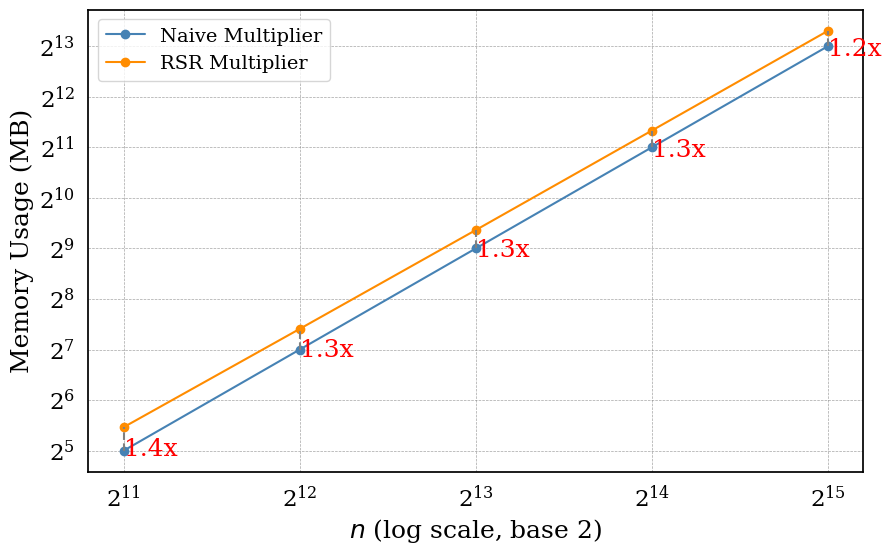

In [40]:
plot(binary_df, "memory_binary")